# Exploratory

Here, we explore the clinical data from the EHR (electronic health records)

## Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../data/raw/ResectMap_DATA_2023-11-13_2306.csv")
# Dataframe with basic information per patient
df_mrn = df[df["mrn"].notna()]
# Dataframe with Engel outcomes
df_engel = df[df["redcap_repeat_instrument"] == "engel_outcomes"]

# Cell to set the flag variable
execute_special_cell = False  # Set this to True to run the special cell

/tmp/ipykernel_1495790/983094782.py:5: DtypeWarning: Columns (8,20,31,39,65,79,83,85,127,130,132,150,153,161,308,313,317,321,325,329,330,334,377,385,403,409,439,440,441,442,443,444,445,453,463,475,512,523,524,525,526,527,528,529,537,566,572,574,588,589,590,591,592,601,602,604,605,606,608,620,621,622,627,633,636,637,639,646,647,658,676,677,682,695,698,712,714,718,720,721,723,725,726,728,732,733,735,748,750,754,757,759,761,762,764,768,770,772,774,776,780,782,786,787,791,796,803,810,812,813,814,815,817,818,880,887,888,896,904,905,906,968,975,976,984,992,993,994,1056,1063,1064,1072,1080,1081,1082,1144,1151,1152,1169,1170,1232,1239,1240,1257,1258,1320,1327,1328,1345,1408,1415,1416,1432,1433,1496,1503,1521,1523,1540,1541,1558,1559,1576,1577,1595,1613,1631,1649,1667,1669,1670,1671,1678,1730,1738,1790,1801,1802,1811,1819,1820,1821,1822,1823,1830,1882,1890,1942,1953,1954,1963,1971,1972,1973,1974,1975,1982,2034,2042,2094,2105,2106,2115,2124,2125,2126,2127,2134,2186,2194,2246,2257,2258,2267,2276,

In [2]:
# Print the number of participants
print("Number of participants in the main df:", df["record_id"].nunique())
print("Number of participants in the MRN df:", df_mrn["record_id"].nunique())
print("Same as number of row ?", df_mrn["record_id"].nunique()==len(df_mrn))
print("Number of participants in the Engel df:", df_engel["record_id"].nunique())
print("Same as number of row ?", df_engel["record_id"].nunique()==len(df_engel))

Number of participants in the main df: 677
Number of participants in the MRN df: 677
Same as number of row ? True
Number of participants in the Engel df: 677
Same as number of row ? False


This means that some of the participants have several Engel outcomes recorded in the EHR

## Distribution of age

In [3]:
print("Minimum age:", df_mrn["age"].min(), "\nMaximum age:", df_mrn["age"].max())

Minimum age: 2.0 
Maximum age: 84.0


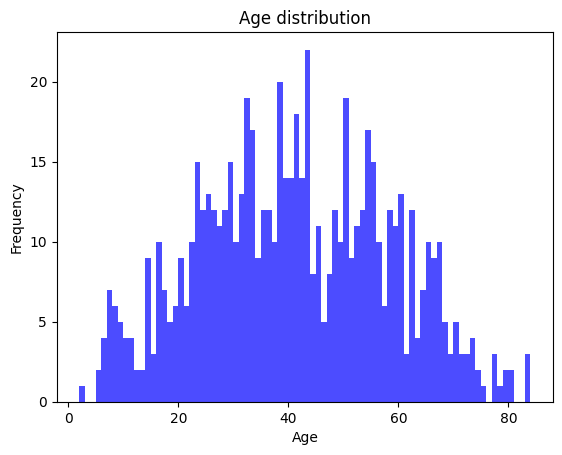

In [4]:
# Create a histogram
plt.hist(df_mrn["age"], bins=82, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

# Show the plot
plt.show()

## Distribution of sex/gender

In [5]:
# Before, 1 represented female and 2 represented male
# Now, 0 represents female and 1 represents male
df_mrn.loc[:,"sex_gender"] = df_mrn["sex_gender"].map({1: 0, 2: 1})

# Define a mapping dictionary
gender_mapping = {0: 'female', 1: 'male'} 

# Count the number of males and females in the dataset
df_mrn["sex_gender"].replace(gender_mapping).value_counts()

sex_gender
female    345
male      332
Name: count, dtype: int64

In [6]:
# Print patients with multiple Engel outcomes
df_engel[df_engel['record_id'].duplicated()]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_nw_z,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2044,RSCT041607,engel_outcomes,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2814,RSCT058378,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3117,RSCT064938,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,RSCT066862,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4412,RSCT091205,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribution of Engel outcomes

In [7]:
# Remove rows where all values are 0
df_engel = df_engel[~(df_engel[['surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']] == 0).all(axis=1)]

# Create 1 column out of the 4 dummy variables for engel outcome
df_engel['surg_engel'] = df_engel[['surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']].idxmax(axis=1).str.split('___').str[1].astype(int)
df_engel[["record_id", "surg_engel", 'surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']].head()

,record_id,surg_engel,surg_engel___1,surg_engel___2,surg_engel___3,surg_engel___4
9,RSCT000111,2,0.0,1.0,0.0,0.0
26,RSCT000208,3,0.0,0.0,1.0,0.0
35,RSCT000277,4,0.0,0.0,0.0,1.0
40,RSCT000508,1,1.0,0.0,0.0,0.0
48,RSCT000749,2,0.0,1.0,0.0,0.0


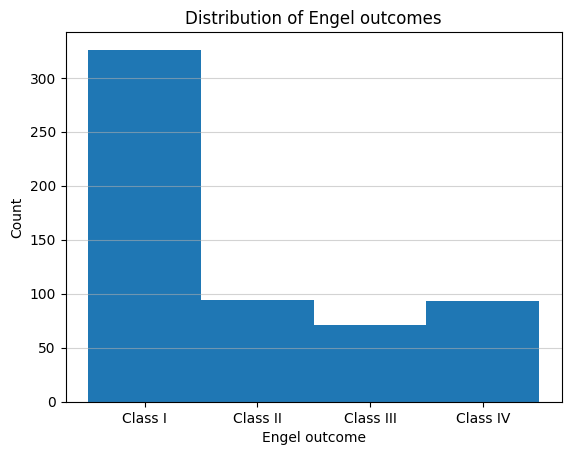

In [8]:
# Create a histogram of the 'surg_engel' variable
plt.hist(df_engel['surg_engel'], bins=[1, 2, 3, 4, 5])  # Specify the bin edges

# Customize x-axis ticks and labels
bin_centers = [1.5, 2.5, 3.5, 4.5]
plt.xticks(bin_centers, ['Class I', 'Class II', 'Class III', 'Class IV'])

# Add labels and title
plt.xlabel('Engel outcome')
plt.ylabel('Count')
plt.title('Distribution of Engel outcomes')

# Add grid for better readability
plt.grid(axis='y', alpha=0.55)

# Show the plot
plt.show()

### Distribution of Engel classes

Class I

    IA: Completely seizure-free since surgery
    IB: Non disabling simple partial seizures only since surgery
    IC: Some disabling seizures after surgery, but free of disabling seizures for at least 2 years
    ID: Generalized convulsions with antiepileptic drug withdrawal only

Class II
    
    IIA: Initially free of disabling seizures but has rare seizures now
    IIB: Rare disabling seizures since surgery
    IIC: More than rare disabling seizures after surgery, but rare seizures for at least 2 years
    IID: Nocturnal seizures only

Class III

    IIIA: Worthwhile seizure reduction
    IIIB: Prolonged seizure-free intervals amounting to greater than half the follow-up period, but not less than 2 years

Class IV

    IVA: Significant seizure reduction
    IVB: No appreciable change
    IVC: Seizures worse

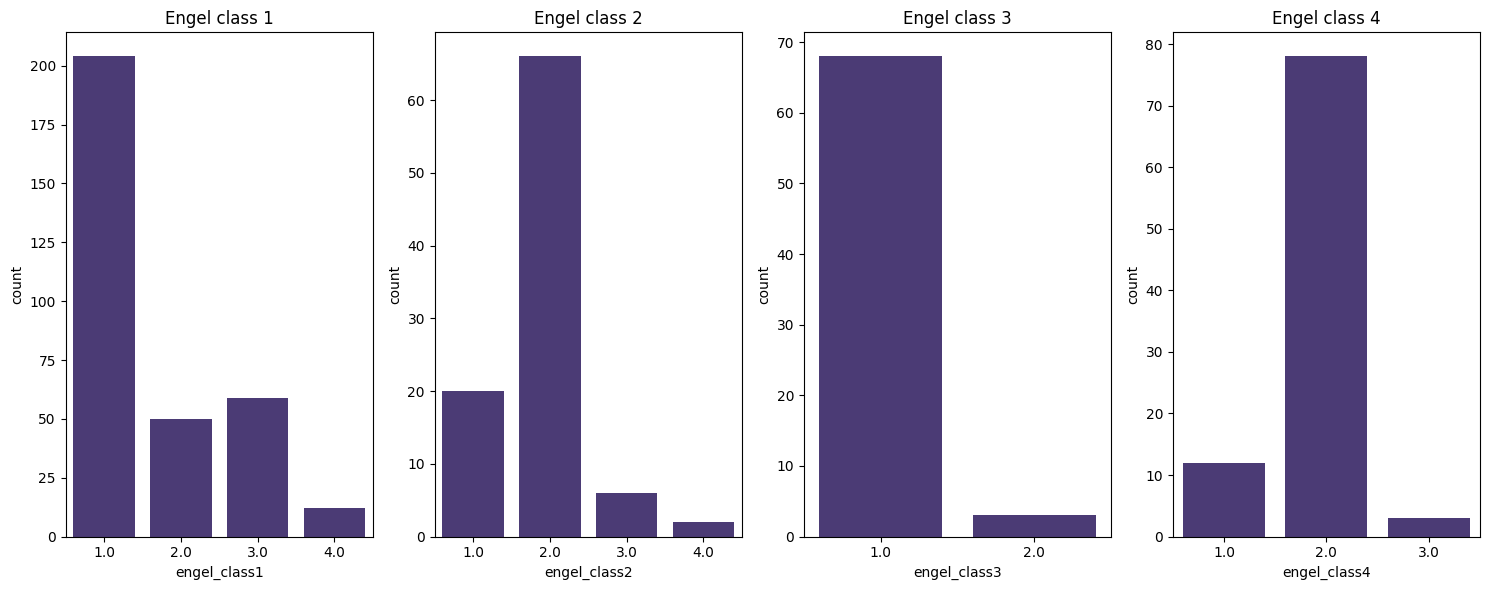

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn palette globally
sns.set_palette('viridis')

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Plot the distribution for engel_class1
plt.subplot(1, 4, 1)
sns.countplot(x='engel_class1', data=df_engel)
plt.title('Engel class 1')

# Plot the distribution for engel_class2
plt.subplot(1, 4, 2)
sns.countplot(x='engel_class2', data=df_engel)
plt.title('Engel class 2')

# Plot the distribution for engel_class3
plt.subplot(1, 4, 3)
sns.countplot(x='engel_class3', data=df_engel)
plt.title('Engel class 3')

# Plot the distribution for engel_class4
plt.subplot(1, 4, 4)
sns.countplot(x='engel_class4', data=df_engel)
plt.title('Engel class 4')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Distribution of Race

In [10]:
# Check for rows where all values are 0
print("Number of rows with all 0 values:" ,(df_mrn.loc[:, ['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']] == 0).all(axis=1).sum())

# Create 1 column out of the 7 dummy variables for race
df_mrn.loc[:, 'race'] = df_mrn.loc[:, ['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].idxmax(axis=1).str.split('___').str[1].astype(int)

# Check that it worked
df_mrn[["record_id", "race", 'race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].head()

Number of rows with all 0 values: 0


/tmp/ipykernel_1495790/3396647371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mrn.loc[:, 'race'] = df_mrn.loc[:, ['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].idxmax(axis=1).str.split('___').str[1].astype(int)


,record_id,race,race___1,race___2,race___3,race___4,race___5,race___6,race___7
0,RSCT000111,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,RSCT000208,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,RSCT000277,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38,RSCT000508,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42,RSCT000749,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
# Define a mapping dictionary
race_mapping = {1: 'African-American/Black', 2: 'Asian', 3: 'Caucasian/White', 4: 'Native American.Alaska Native', 5: 'Native Hawaiian/Other Pacific Islander', 6: 'Other', 7: 'Unknown/Not-Reported'}

# Count the number of males and females in the dataset
df_mrn["race"].replace(race_mapping).value_counts()

race
Caucasian/White                           460
Other                                      80
African-American/Black                     55
Unknown/Not-Reported                       51
Asian                                      29
Native Hawaiian/Other Pacific Islander      2
Name: count, dtype: int64

## Tables of Na percentage per column

### df_mrn

No data in df_mrn from column 380 and on

In [12]:
# Calculate the percentage of NaN values per column
na_percentage = (df_mrn.iloc[:,:380].isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df_mrn = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Display the resulting DataFrame
print(na_df_mrn)

                        Column  Percentage of NaN
0                    record_id               0.00
1     redcap_repeat_instrument             100.00
2       redcap_repeat_instance             100.00
3                          mrn               0.00
4                   study_site               0.00
..                         ...                ...
375        prev_aeds_name___38               0.00
376        prev_aeds_name___39               0.00
377            aeds_prev_other              84.49
378                  aed_notes              28.21
379  epilepsy_history_complete               0.00

[380 rows x 2 columns]


### df_engel

No data in df_engel before column 3451 and after 3466

In [13]:
# Calculate the percentage of NaN values per column
na_percentage = (df_engel.isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df_engel = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Create a new DataFrame with the columns that are completely empty
empty_df_engel = na_df_engel[na_df_engel["Percentage of NaN"]==100]

# Remove columns with only NAs
df_engel_drop = df_engel.drop(columns=empty_df_engel["Column"])

# Display the resulting DataFrame
print(na_df_engel[na_df_engel["Percentage of NaN"]!=100])

                        Column  Percentage of NaN
0                    record_id               0.00
1     redcap_repeat_instrument               0.00
2       redcap_repeat_instance               0.00
3451               eo_reviewer               0.86
3452              eo_date_surg               1.71
3453              eo_date_clin               0.51
3454              eo_type_clin               3.60
3455           eo_yrs_postsurg               1.88
3456            surg_engel___1               0.00
3457            surg_engel___2               0.00
3458            surg_engel___3               0.00
3459            surg_engel___4               0.00
3460              engel_class1              44.35
3461              engel_class2              83.90
3462              engel_class3              87.84
3463              engel_class4              84.08
3464               eo_comments              32.19
3465   engel_outcomes_complete               0.00
4677                surg_engel               0.00


### df

No data in the df in 72 columns 

In [14]:
# Calculate the percentage of NaN values per column
na_percentage = (df.isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Create a new DataFrame with the columns that are completely empty
empty_df = na_df[na_df["Percentage of NaN"]==100]

# Remove columns with only NAs
df_drop = df.drop(columns=empty_df["Column"])

There appears to be 2 instance where the column "engel_outcomes_complete" has the value 0 instead of 2 which matches with a patient with 3 engel outcomes

In [15]:
df_engel["engel_outcomes_complete"].unique()
df_engel[df_engel["engel_outcomes_complete"]==0]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete,surg_engel
2042,RSCT041607,engel_outcomes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


Check the data types of the different columns

In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 4677 columns):
 #     Column                               Dtype  
---    ------                               -----  
 0     record_id                            object 
 1     redcap_repeat_instrument             object 
 2     redcap_repeat_instance               float64
 3     mrn                                  float64
 4     study_site                           float64
 5     study_site_other                     float64
 6     ny_num_yn                            float64
 7     ny_num                               object 
 8     other_study_ids                      object 
 9     inc_crit                             float64
 10    dem_yob                              float64
 11    age                                  float64
 12    sex_gender                           float64
 13    race___1                             float64
 14    race___2                             float64
 15    

In [17]:
if execute_special_cell:

    test = df_drop[df_drop["redcap_repeat_instance"]==1]

    # Group by 'record_id' and aggregate non-null values for each column
    consolidated_df = df.groupby('record_id').agg(lambda x: x.dropna().iloc[0] if not x.dropna().empty else None)

    # Reset the index to get a clean DataFrame
    consolidated_df = consolidated_df.reset_index()

    # Now, consolidated_df contains one row per patient with non-null information
    print(consolidated_df)

    # Save dataframe for further use
    consolidated_df.to_csv("../../data/processed/consolidated_df.csv")

In [18]:
if execute_special_cell:

    # Calculate the percentage of NaN values per column
    na_percentage = (consolidated_df.isna().mean() * 100).round(2)

    # Create a new DataFrame with the results
    na_consolidated_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

    # Display the resulting DataFrame
    print(na_consolidated_df[na_consolidated_df["Percentage of NaN"]==100])
else:
    consolidated_df = pd.read_csv("../../data/processed/consolidated_df.csv")

    print(consolidated_df.isna().sum().sort_values())

/tmp/ipykernel_1495790/409264335.py:12: DtypeWarning: Columns (84,86,128,133,151,314,318,322,326,330,335,410,464,476,513,524,525,526,527,528,529,530,567,573,589,603,605,606,607,609,621,622,623,628,634,637,638,640,647,696,713,715,719,721,722,724,726,727,729,733,734,736,749,751,755,758,760,762,763,765,775,792,797,811,813,814,815,816,818,819,888,889,897,905,906,907,969,976,977,985,993,994,995,1057,1064,1065,1073,1081,1082,1083,1145,1152,1153,1170,1171,1233,1240,1241,1258,1259,1321,1328,1329,1346,1409,1416,1417,1433,1434,1497,1504,1524,1541,1542,1559,1560,1577,1578,1596,1614,1632,1650,1679,1731,1739,1802,1803,1812,1820,1831,1891,1954,1955,1964,1972,1983,2035,2043,2106,2116,2135,2187,2195,2258,2259,2268,2287,2339,2347,2399,2410,2411,2420,2428,2439,2491,2499,2551,2562,2563,2591,2643,2651,2703,2714,2715,2732,2736,2743,2795,2803,2866,2867,2884,2886,2887,2900,2904,2913,2918,2930,2952,2978,3174,3245,3308,3394,3479,3480,3589,3590,3629,3633,3645,3656,3657,3658,3661,3662,3663,3685,3686,3727,3728,37

psych_history___4             0
psych_history___5             0
psych_history___6             0
psych_history___7             0
psych_history___8             0
                           ... 
eeg_intict_other_circ6      677
eeg_intict_other_period6    677
srs_smot_2t                 677
study_site_other            677
srs_sc_t2                   677
Length: 4678, dtype: int64


## Distribution of Years post-surgery

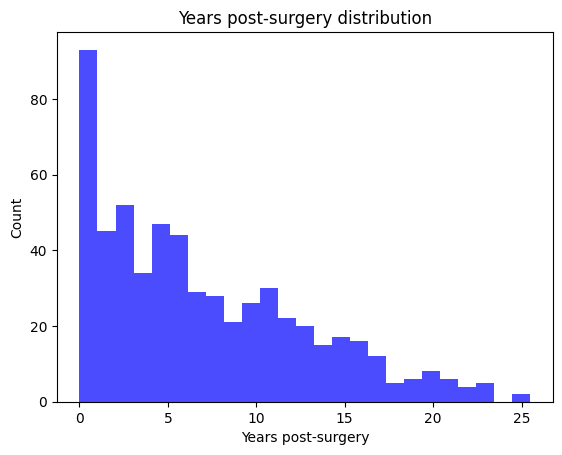

In [19]:
# Create a histogram
plt.hist(consolidated_df["eo_yrs_postsurg"], bins=25, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Years post-surgery')
plt.ylabel('Count')
plt.title('Years post-surgery distribution')

# Show the plot
plt.show()

## Distribution of the number of surgeries

In [1]:
import pandas as pd

# Read dataframe from the pickle format
wide_df = pd.read_csv("../../data/processed/preprocessed_df.csv")

/tmp/ipykernel_36190/4254179035.py:4: DtypeWarning: Columns (81,123,146,313,317,321,325,381,459,508,519,520,521,522,523,524,525,533,562,568,584,585,586,587,588,597,616,617,618,623,629,632,633,635,642,678,691,694,708,710,714,716,717,719,722,724,728,729,731,744,750,753,755,757,758,760,764,766,768,770,772,808,809,810,811,813,876,883,892,901,971,980,989,1052,1059,1060,1068,1076,1140,1236,1519,1536,1537,1554,1572,1726,1734,1786,1797,1807,1878,1886,1938,1949,1959,2030,2038,2090,2101,2102,2111,2182,2190,2242,2253,2254,2263,2282,2334,2342,2394,2405,2406,2415,2486,2494,2546,2557,2558,2638,2646,2698,2709,2710,2731,2738,2790,2798,2850,2861,2862,2885,2895,2899,2908,2913,2925,2947,2973,2974,3112,3124,3152,3169,3240,3301,3312,3321,3389,3474,3475,3584,3585,3624,3636,3640,3656,3657,3658,3680,3681,3722,3723,3724,3740,3741,3837,3840,3852,3856,3858,3859,3863,3868,3873,3882,3883,3941,3942,3966,3968,3973,3974,3975,3977,3978,3979,3982,3997,3999,4000,4001,4002,4004,4009,4011,4013,4014,4015,4016,4017,4018,401

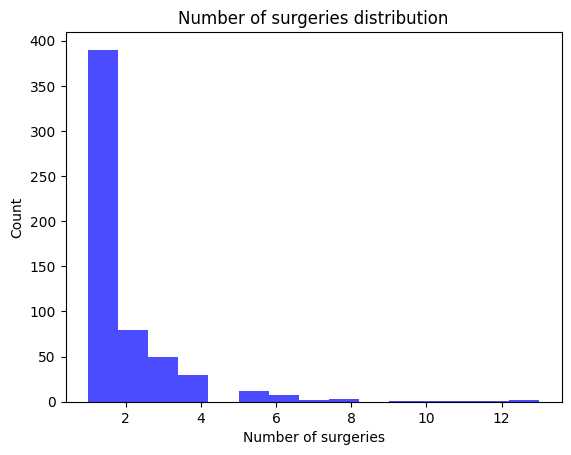

In [2]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(wide_df["surgical_information"], bins=15, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Number of surgeries')
plt.ylabel('Count')
plt.title('Number of surgeries distribution')

# Show the plot
plt.show()

In [3]:
def create_surg_group(nbr_surg):
    if nbr_surg == 1:
        return "Group 1"
    elif nbr_surg == 2:
        return "Group 2"
    else:
        return "Group 3"

wide_df["surgical_group"] = wide_df["surgical_information"].apply(create_surg_group)

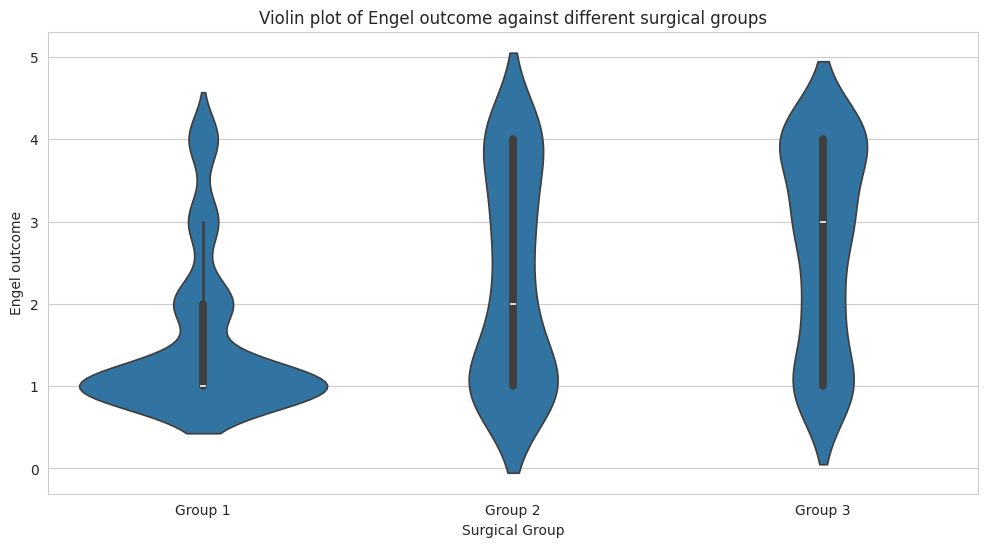

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order
group_order = ['Group 1', 'Group 2', 'Group 3']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))  # You can adjust the size of the plot
plot = sns.violinplot(x='surgical_group', y='surg_engel', order=group_order, data=wide_df)
#plot = sns.countplot(x='surgical_group', hue='surg_engel', order=group_order, data=wide_df)

# Set titles and labels (optional)
plt.title('Violin plot of Engel outcome against different surgical groups')
plt.xlabel('Surgical Group')
plt.ylabel('Engel outcome')

# Display the plot
plt.show()

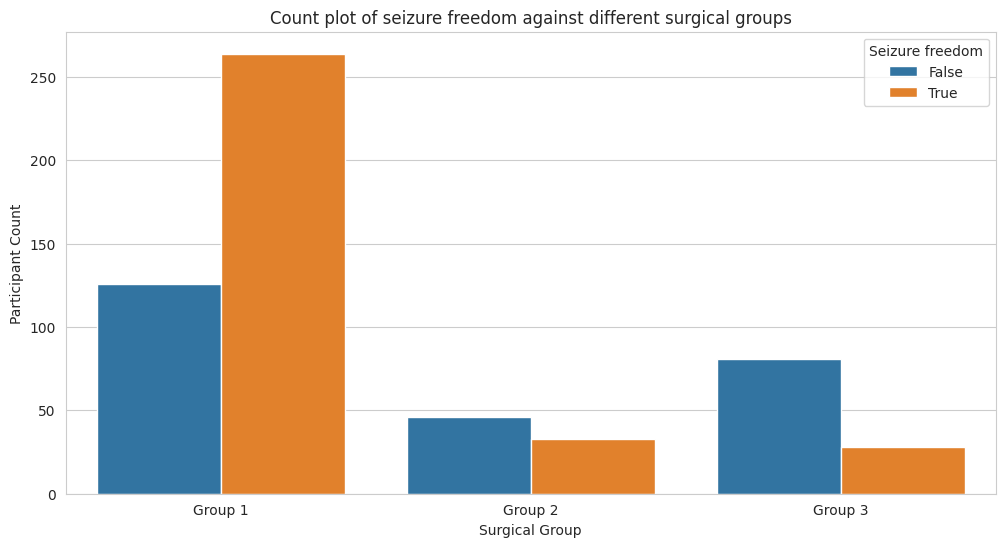

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

wide_df["surg_engel_binary"] = wide_df["surg_engel"]==1

# Define the desired order
group_order = ['Group 1', 'Group 2', 'Group 3']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))  # You can adjust the size of the plot
plot = sns.countplot(x='surgical_group', hue='surg_engel_binary', order=group_order, data=wide_df)

# Set titles and labels (optional)
plt.title('Count plot of seizure freedom against different surgical groups')
plt.xlabel('Surgical Group')
plt.ylabel('Participant Count')

# Customize legend
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['False', 'True'], title='Seizure freedom', loc='upper right')

# Display the plot
plt.show()

## Print system information

In [6]:
import session_info

session_info.show()